# Module 4.6 — Time to Ruin Distributions
#### Core idea

Ruin is not just a binary outcome.    
When a system dies matters more than whether it can die in theory.     

Most people only ask: *“Does this system blow up?”*    
The correct question is: **“How long do most paths survive before they die?”**

#### we are measuring:
- Time-to-ruin (number of trades before death)
- Across different risk per trade
- with the same underlying edge

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
n_traders = 1000
n_trades = 5000
p = 0.55                # winning system
start_capital = 1.0
ruin_threshold = 0.01   # 90% acount bolowout

In [3]:
def run_simulation(risk):
    rand_matrix = np.random.rand(n_traders, n_trades)
    ruin_lengths = [] 

    for r in range(n_traders):
        capital = start_capital
        length = 0
 
        for c in range(n_trades):
            bet = capital * risk

            if rand_matrix[r, c] < p:
                capital+= bet
            else:
                capital -= bet

            length += 1

            if capital <= ruin_threshold:
                ruin_lengths.append(length)
                break
 
    return ruin_lengths
  

In [4]:
risks = np.arange(0.01 , 0.30, step = 0.02)
ruins = [run_simulation(risk) for risk in risks]


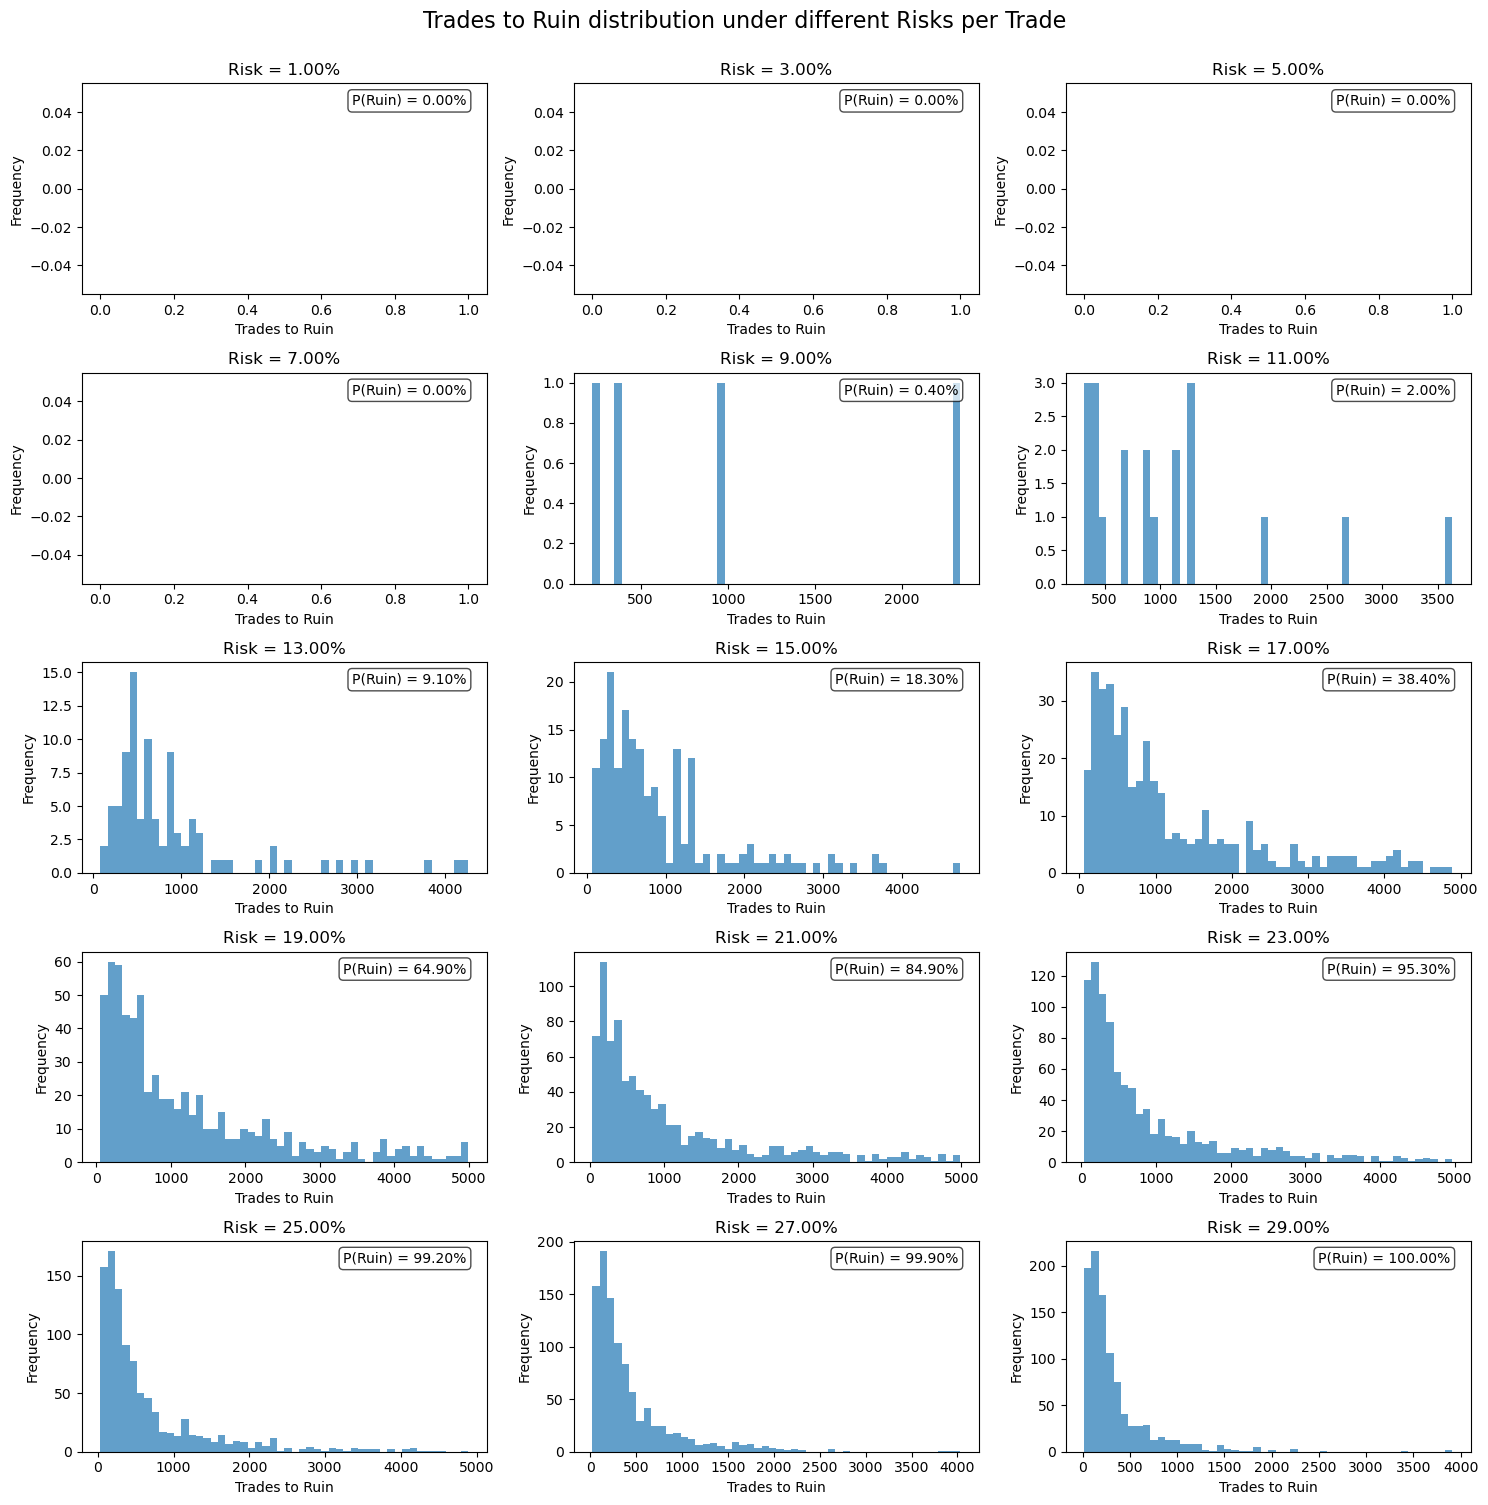

In [5]:
ncols = 3
nrows = np.ceil(len(risks)/ncols).astype(int)

fig, ax = plt.subplots(nrows, ncols, figsize = (15, 15))
ax = ax.ravel()

for i, risk in enumerate(risks):
    prob = len(ruins[i]) / n_traders
    ax[i].hist(ruins[i], bins=50, alpha=0.7)
    ax[i].set_title(f'Risk = {risk*100:.2f}%')
    ax[i].set_xlabel('Trades to Ruin')
    ax[i].set_ylabel('Frequency')

    ax[i].text(
        0.95, 0.95,
        f'P(Ruin) = {prob:.2%}',
        transform=ax[i].transAxes,
        ha='right',
        va='top',
        fontsize=10,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
    )
    
# Turn off unused subplots
for j in range(len(risks), len(ax)):
    ax[j].axis('off')

fig.suptitle('Trades to Ruin distribution under different Risks per Trade', y = 1, fontsize = 16)
plt.tight_layout()
plt.show()

# Observation
### As risk per trade increases, ruin transitions from a rare, late event to a common, early one.
### At low risk levels, no traders reach the ruin threshold within the simulation horizon.
### At moderate risk levels, ruin appears but occurs after long trade sequences, creating an illusion of safety.
### At high risk levels, the entire time-to-ruin distribution shifts left: most accounts fail quickly and quietly.
### Survival is therefore not a function of expectancy or accuracy, but of position sizing controlling how fast variance can hit the boundary.